In [1]:
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse



In [2]:
y_pred = [1, 0, 2, 2, 0]
sparse.coo_matrix((np.ones_like(y_pred), (y_pred, np.arange(len(y_pred)))), shape= (3, len(y_pred))).toarray().T

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]])

## Intital data

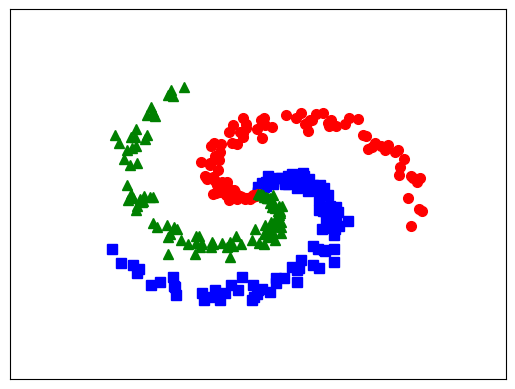

In [3]:
N = 100 # number of points per class
d0 = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d0, N*C)) # data matrix
y = np.zeros(N*C, dtype='uint8')
for j in range(C):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
    y[ix] = j
# lets visualize the data:
# plt.scatter(X[:N, 0], X[:N, 1], c=y[:N], s=40, cmap=plt.cm.Spectral)

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.savefig('EX.png', bbox_inches='tight', dpi = 600)
plt.show()

In [4]:
def softmax(Z):
    e_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    '''
    np.max(Z, axis=0, keepdims=False)
    là mấy giá trị lớn nhất của mỗi cột và keepdims là có muốn giữ số chiều hay không 
    ---------------------
    keepdims = False    |
    array([7, 8, 9])    |
    --------------------|
    keepdims = True     | 
    array([[7, 8, 9]])  |
    ---------------------
    
    Dòng code này là dùng để nén các giá trị dữ liệu lại
    
    '''
    A = e_Z / e_Z.sum(axis = 0)
    
    return A


In [5]:
from scipy import sparse

In [6]:
# One-hot coding

def convert_labels(y, C = C):
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape= (C, len(y))).toarray()
    return Y

In [7]:
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]


In [8]:
d1 =h = 100 # size of hidden layer
d0 = 2
d2 = C = 3
# Khởi tạo thông số random 
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

In [9]:
W1.shape

(2, 100)

In [10]:
X

array([[ 0.00000000e+00, -1.01294107e-03, -2.21812522e-03,
         5.62062166e-03,  1.46733541e-02,  3.69857856e-03,
         9.87378878e-04,  3.36026296e-02,  5.04632188e-02,
         2.42520687e-02,  5.21231098e-02,  5.03602863e-02,
         8.81704766e-02,  8.94509525e-02,  9.34577553e-02,
         9.23566898e-02,  6.15652270e-02,  1.14514220e-01,
         1.62258819e-01,  1.36413675e-01,  1.83537255e-01,
         1.75173914e-01,  1.82066698e-01,  1.80754968e-01,
         2.36312144e-01,  2.43870924e-01,  2.05802894e-01,
         2.30084703e-01,  2.60082985e-01,  2.84300789e-01,
         3.02228101e-01,  2.76746411e-01,  2.74339907e-01,
         3.08684754e-01,  3.34805652e-01,  3.48211479e-01,
         3.60880962e-01,  3.70356441e-01,  3.76284654e-01,
         3.71307096e-01,  4.01223340e-01,  3.90319489e-01,
         4.24132205e-01,  4.08341561e-01,  4.34413195e-01,
         4.08301564e-01,  4.45551546e-01,  3.84300462e-01,
         4.73410178e-01,  4.17682332e-01,  4.84324798e-0

In [11]:
X.shape

(2, 300)

In [12]:

Y = convert_labels(y, C)
N = X.shape[1]
eta = 1
for i in range(10000):
    ## Feedforward
    Z1 = np.dot(W1.T, X) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)
    if i %1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(Y, Yhat)
        print("iter %d, loss: %f" %(i, loss))
    # backpropagation
    E2 = (Yhat - Y)/N
    dw2 = A1@E2.T
    db2 = np.sum(E2, axis=1, keepdims=True)
    E1 = W2@E2
    E1[Z1 <= 0] = 0
    dw1 = X@E1.T
    db1 = np.sum(E1, axis=1, keepdims=True)
    
    # Gradient Descent update
    W1 += -eta*dw1
    W2 += -eta*dw2
    b1 += -eta*db1
    b2 += -eta*db2

iter 0, loss: 1.098448
iter 1000, loss: 0.138707
iter 2000, loss: 0.051328
iter 3000, loss: 0.036728
iter 4000, loss: 0.030677
iter 5000, loss: 0.027261
iter 6000, loss: 0.024955
iter 7000, loss: 0.022969
iter 8000, loss: 0.021505
iter 9000, loss: 0.020393


In [15]:
Z1 = np.dot(W1.T, X) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
print(Z2.shape)
print('training accuracy: %.2f %%' % (100*np.mean(predicted_class == y)))

(3, 300)
training accuracy: 99.33 %


In [ ]:
import numpy as np
import random

class MutilayerPerceptron:
    classifical_flower = {
        1: ['Iris-setosa', np.array([1,0,0])],
        2: ['Iris-versicolor', np.array([0,1,0])],
        3: ['Iris-virginica', np.array([0,0,1])]
    }
    
    def __init__(self, params=None):
        self.output = None
        self.output_layer1 = None
        self.output_layer2 = None
        if params is None:
            self.inputLayer = 4
            self.hiddenLayer = 5
            self.outputLayer = 3
            self.learningRate = 0.0001
            self.max_epochs = 600
            self.BiasHiddenValue = -1
            self.BiasOutputValue = -1
        else:
            self.inputLayer = params['InputLayer']
            self.hiddenLayer = params['HiddenLayer']
            self.outputLayer = params['OutputLayer']
            self.learningRate = params['LearningRate']
            self.max_epochs = params['max_epochs']
            self.BiasHiddenValue = params['BiasHiddenValue']
            self.BiasOutputValue = params['BiasOutputValue']
        
        # Initialize weights and biases
        self.weight_hidden = np.array([[random.uniform(-1, 1) for x in range(self.hiddenLayer)] for i in range(self.inputLayer)])
        self.weight_output = np.array([[random.uniform(-1, 1) for x in range(self.outputLayer)] for i in range(self.hiddenLayer)])

        self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
        self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.outputLayer)])
        self.classes_number = 3
    
    def softmax(self, Z):
        e_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
        return e_Z / e_Z.sum(axis=0)
    
    def cost(self, Y, Y_hat):
        return -np.sum(Y * np.log(Y_hat)) / len(Y)
    
    def predict(self, X, y=None):
        self.output_layer1 = X @ self.weight_hidden + self.BIAS_hidden
        A1 = np.maximum(0, self.output_layer1)
        self.output_layer2 = A1 @ self.weight_output + self.BIAS_output
        y_hat = self.softmax(self.output_layer2)
        y_hat = np.argmax(y_hat.T, axis=0) + 1
        acc = np.mean(y_hat == y) * 100
        return acc
    
    def fit(self, X, y, xval, yval):
        count_epoch = 1
        parame = []
        while count_epoch <= self.max_epochs:
            total_loss = 0
            for idx, inputs in enumerate(X):
                # Stage 1: Forward Propagation
                self.output_layer1 = inputs @ self.weight_hidden + self.BIAS_hidden
                A1 = np.maximum(0, self.output_layer1)
                self.output_layer2 = A1 @ self.weight_output + self.BIAS_output
                y_hat = self.softmax(self.output_layer2)
                # print('++++++++++++')
                # print(self.classifical_flower[int(y[idx])])
                self.output = self.classifical_flower[int(y[idx])][1]
                # print('++++++++++++')
                # Calculation Loss
                total_loss += self.cost(self.output, y_hat)
                
                # Stage 2: Backprop
                # Stage 2: Backpropagation
                E_layer2 = (1/len(inputs)) * (y_hat - self.output)
                dw2 = A1.reshape(-1, 1) @ E_layer2.reshape(1, -1)
                db2 = np.sum(E_layer2, axis=0)
                
                E_layer1 = self.weight_output @ E_layer2
                E_layer1[self.output_layer1 <= 0] = 0 
                dw1 = inputs.reshape(-1, 1) @ E_layer1.reshape(1, -1)
                db1 = np.sum(E_layer1, axis=0)
                
                # Update gradient descent
                self.weight_hidden -= self.learningRate * dw1
                self.BIAS_hidden = self.BIAS_hidden.astype(np.float64)
                self.BIAS_hidden -= self.learningRate * db1
                self.weight_output -= self.learningRate * dw2
                self.BIAS_output = self.BIAS_output.astype(np.float64)
                self.BIAS_output -= self.learningRate * db2
                
            print(f'Epoch {count_epoch}: Loss {total_loss / X.shape[1]}: Train ACC = {self.predict(X, y)}: Val ACC = {self.predict(xval, yval)}\n')
            parame.append([self.weight_hidden, self.BIAS_hidden, self.weight_output, self.BIAS_output])
            count_epoch += 1
        # Return parameters
        # return parame